In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2
import itertools

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
import tensorflow as tf
from tensorflow import keras


from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


C:\Users\kanov\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Cats and Dogs classification.

## Is possible to classificate Cats and Dogs with neural network algorithm?


## Author: Ivaylo Kanov & the Deep Learning Course Students

## In the analitycs are used the datasets from Kaggle https://www.kaggle.com/c/dogs-vs-cats


### Project idea:
In this project I will try to classify a dog or cat picture with the help of a convolutional neural network.

### 1. Read data.

From the data i use only train set. From that data i take 1000 images (first 500 cats and last 500 dogs) for testing data. My idea is to be able to use the automatik classification for the test data on behalf of the image.


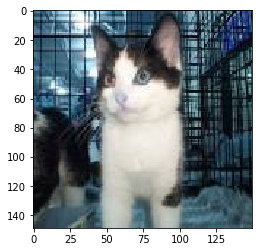

cat


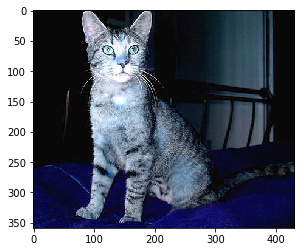

cat


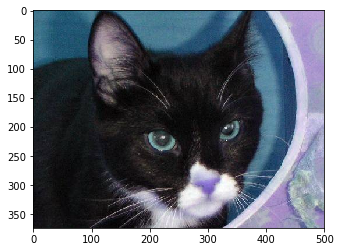

cat


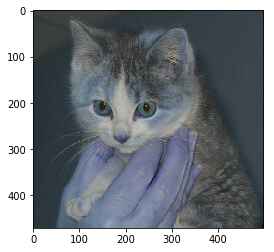

cat


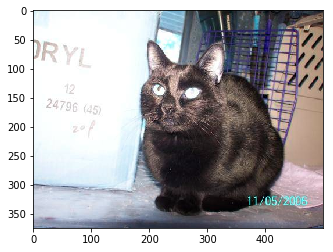

cat


In [5]:
# Display 5 images
DATA_DIR = "Data/train/"
for file_name in os.listdir(DATA_DIR)[0:5]:
    img_array = cv2.imread(os.path.join(DATA_DIR, file_name))
    plt.imshow(img_array)
    plt.show()
    print(file_name.split('.')[0])

When i read some images i notice that they have different dimension. First my plan was to create model with dimension 32 x 32 x 3. After more iteration i don't found good model for classification. My next dimension for exploration was 62 x 62 x 3, because my PC have no memery for more.

In [6]:
#create data
DATA_DIR = "Data/train/"
IMG_SIZE = 64
def create_data(data):
    x = []
    y = []
    for file_name in os.listdir(data):
        img_array = cv2.imread(os.path.join(data, file_name))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        x.append(new_array)
        if file_name.split('.')[0] == 'cat':
            y.append(0)
        else:
            y.append(1)
    return x, y

In [7]:
import random
x, y = create_data(DATA_DIR)
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(24000, 64, 64, 3)
(24000,)


Тhe first thing I check is the distribution of the images. They are with correct distribution.

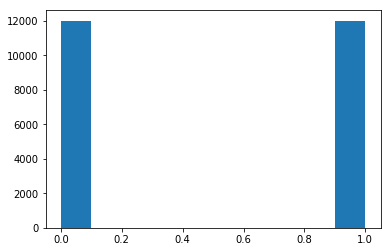

In [8]:
plt.hist(y)
plt.show()

In [9]:
# Images normalization
X_train = x / 255.0
# Do categorical
Y_train = to_categorical(y, num_classes = 2)

In [10]:
print(X_train.shape)
print(Y_train.shape)

(24000, 64, 64, 3)
(24000, 2)


In [11]:
# Separate data to train and 10% validation 
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, train_size = 0.9)

C:\Users\kanov\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
x_train.shape[1:]

(64, 64, 3)

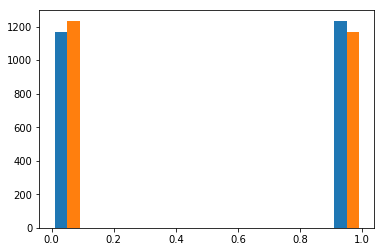

In [13]:
# Distribution check
plt.hist(y_val)
plt.show()

### 1. CNN model

### My plan

1. Create base model
2. Chooce loss: categorical_crossentropy, metric: accuracy, optimizer: adam
3. 12 epochs.
4. To try batch size 32 and 64 and to choose best on baseline model.
5. To tune learning rate. My idea is to try 0.01, 0.001, 0.0001 and 0.00001
6. To try L2 regularization

## Results

Iteration 1; batch size = 64; Lr = 0.001; l2 = None;
train: [0.21100622827808063, 0.9064814814814814] val:[0.4078665096561114, 0.8575]               test: 0.858 wrong images 142

Iteration 2; batch size = 32; Lr = 0.001; l2 = None;
train: [0.10900783433130494, 0.9625925925925926] val:[0.24661737273136775, 0.9079166666666667]  test: 0.885 wrong images 115

Iteration 3; batch size = 32; Lr = 0.001; l2 = None;
train: [0.14083257638883812, 0.9437962962962962] val:[0.35021436095237735, 0.8625]              test: 0.893 wrong images 107

Iteration 4; batch size = 32; Lr = 0.001; l2 = None;
train: [0.13854460602557217, 0.9416666666666667] val:[0.3045853785673777, 0.8795833333333334]   test: 0.891 wrong images 109

### After 4 iteration i choose batch size 32

Iteration 5; batch size = 32; Lr = 0.01; l2 = None;
train: [0.48060851483433337, 0.7525] val:[0.4982249744733175, 0.7483333333333333]   test: 0.771 wrong images 229

Lr = 0.001 is in iteration 4

Iteration 6; batch size = 32; Lr = 0.0001; l2 = None;
train: [0.39392917410091116, 0.8281481481481482] val:[0.43292904098828633, 0.7916666666666666]   test: 0.821 wrong images 179

Iteration 7; batch size = 32; Lr = 0.00001; l2 = None;
train: [0.5499462710045002, 0.7185185185185186] val:[0.5605028478304545, 0.7070833333333333]   test: 0.706 wrong images 294

### Iteration 6 and 7 generalize better and i try to increase epochs for them to 20

Iteration 8; batch size = 32; Lr = 0.0001; l2 = None;
train: [0.2925231499694012, 0.8834722222222222] val:[0.38338739494482676, 0.8320833333333333]   test: 0.837 wrong images 163

Iteration 9; batch size = 32; Lr = 0.00001; l2 = None;
train: [0.5589167824497929, 0.7261574074074074] val:[0.5778447131315867, 0.7108333333333333]   test: 0.73 wrong images 270

Iteration 10; batch size = 32; Lr = 0.0001; l2 = None;
train: [0.09685731173665435, 0.9641203703703703] val:[0.3899970946709315, 0.86]   test: 0.873 wrong images 127

Iteration 11; batch size = 32; Lr = 0.0001; l2 = None;
train: [0.07476300382917678, 0.9762962962962963] val:[0.33205576717853547, 0.8804166666666666]   test: 0.896 wrong images 104

Next step is on base of iteration 11 to explore l2 regularizer

In [14]:
baseMapNum = 64
num_classes = 2
weight_decay = 0.0001
model = Sequential()
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=None, input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(BatchNormalization())


model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=None))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(BatchNormalization())

model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=None))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=None))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))




model.add(Dense(num_classes, activation='softmax'))

In [15]:
batch_size = 32
epochs=20
#opt_rms = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
opt_adam = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_adam,
        metrics=['accuracy'])

In [16]:
history = model.fit(x=x_train,
          y=y_train, epochs=epochs,batch_size = batch_size ,validation_data = (x_val,y_val))

Train on 21600 samples, validate on 2400 samples
Epoch 1/20
21600/21600 [==============================] - 27s 1ms/step - loss: 0.9879 - acc: 0.6202 - val_loss: 0.5668 - val_acc: 0.7096
Epoch 2/20
21600/21600 [==============================] - 24s 1ms/step - loss: 0.6108 - acc: 0.6853 - val_loss: 0.5337 - val_acc: 0.7462
Epoch 3/20
21600/21600 [==============================] - 24s 1ms/step - loss: 0.5342 - acc: 0.7323 - val_loss: 0.5057 - val_acc: 0.7562
Epoch 4/20
21600/21600 [==============================] - 24s 1ms/step - loss: 0.4815 - acc: 0.7686 - val_loss: 0.4890 - val_acc: 0.7592
Epoch 5/20
21600/21600 [==============================] - 24s 1ms/step - loss: 0.4455 - acc: 0.7929 - val_loss: 0.4539 - val_acc: 0.7788
Epoch 6/20
21600/21600 [==============================] - 25s 1ms/step - loss: 0.4051 - acc: 0.8135 - val_loss: 0.3976 - val_acc: 0.8254
Epoch 7/20
21600/21600 [==============================] - 26s 1ms/step - loss: 0.3810 - acc: 0.8266 - val_loss: 0.4425 - val_acc:

In [17]:
model.evaluate(x_train, y_train)


21600/21600 [==============================] - 9s 425us/step


[0.07476300382917678, 0.9762962962962963]

In [18]:
model.evaluate(x_val, y_val)

2400/2400 [==============================] - 1s 374us/step


[0.33205576717853547, 0.8804166666666666]

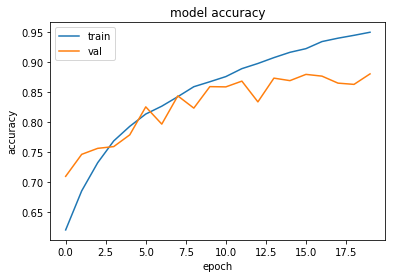

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

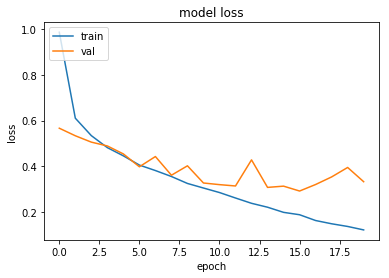

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
__________

In [22]:
#create data
DATA_DIR_TEST = "Data/test/"
x_test, y_test = create_data(DATA_DIR_TEST)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1000, 64, 64, 3)
(1000,)


In [23]:
# predict results
#test = create_test_data()
test = x_test / 255.0
results = model.predict(test)
results.shape

(1000, 2)

In [24]:
result_clasification = []
for i in range(len(results)):
    if results[i][0] > 0.5:
        result_clasification.append(0)
    else:
        result_clasification.append(1)


In [25]:
sum = 0
for i in range(0,len( result_clasification)):
    if y_test[i] ==  result_clasification[i]:
        sum +=1

print("test: %s wrong images %d" % (sum/len(x_test), len(x_test)-sum))

test: 0.896 wrong images 104


In [26]:
##model saving
model.save('CatsVsDogs_CV_model')

## If you want to try different image

In [27]:
def prepare(filepath):
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    new_array = np.expand_dims(new_array, axis=0)
    return np.array(new_array)/255

In [28]:
# load model
model = tf.keras.models.load_model('CatsVsDogs_CV_model')

In [29]:
# predict
CATEGORIES = ["Dog","Cat"]
picture_name = '1.jpg'

prediction=model.predict([prepare(picture_name)])
print(prediction)
print(CATEGORIES[int(np.round(prediction[0][0], decimals=0))])


[[0.9625457  0.03745433]]
Cat


## Conclusion

My results aren't so good as ResNet50 for example, but they are mine my achievement. Compared with more free kernals in competition, my achievements are 2 times better. :)

## My ideas for the future:

1. Тo increase the dimensions of the images
2. To do data augumentation
3. To create better model then ResNet50
